In [2]:
%matplotlib inline
from miran import *
import seaborn as sns
import matplotlib as mpl

PRINT_QUALITY = 300

sns.set_palette("Greys_d", 2)
sns.set_style('whitegrid', {'axes.linewidth': 0,  'axes.edgecolor': 'gray'})#, 'axes.facecolor':'snow'})
mpl.rc('font', **{'family':'serif', 'serif':['Times']})
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('axes', labelsize=9)
mpl.rc('text', usetex=True)

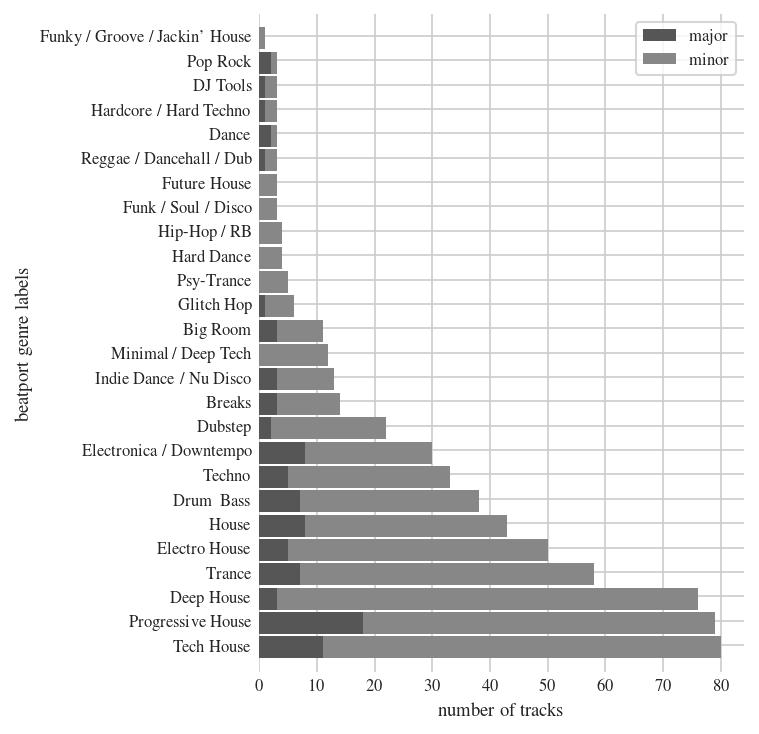

In [3]:
# BINARY MODALIY GS DISTRIBUTION

name="gsgenres"
output_dir="/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/"

gen = [(11,69,'Tech House'),
       (18,61,'Progressive House'),
       (3,73,'Deep House'),
       (7,51,'Trance'),
       (5,45,'Electro House'),
       (8,35,'House'),
       (7,31,'Drum & Bass'),
       (5,28,'Techno'),
       (8,22,'Electronica / Downtempo'),
       (2,20,'Dubstep'),
       (3,11,'Breaks'),
       (3,10,'Indie Dance / Nu Disco'),
       (0,12,'Minimal / Deep Tech'),
       (3,8,'Big Room'),
       (1,5,'Glitch Hop'),
       (0,5,'Psy-Trance'),
       (0,4,'Hard Dance'),
       (0,4,'Hip-Hop / R&B'),
       (0,3,'Funk / Soul / Disco'),
       (0,3,'Future House'),
       (1,2,'Reggae / Dancehall / Dub'),
       (2,1,'Dance'),
       (1,2,'Hardcore / Hard Techno'),
       (1,2,'DJ Tools'),
       (2,1,'Pop Rock'),
       (0,1,"Funky / Groove / Jackin' House")]
    
major = np.array(np.column_stack(gen)[0].astype(np.int))
minor = np.array(np.column_stack(gen)[1].astype(np.int))
    
total_maj = 91
total_min = 509
total_items = total_maj + total_min
percentage_factor = 100.00 / total_items
percentage_major = np.multiply(major, percentage_factor)
percentage_minor = np.multiply(minor, percentage_factor)

# NOW THE PLOTTING
plt.figure(figsize=(5.16, 5), dpi=150)

plt.ylabel('beatport genre labels')
plt.ylim((-1, 26))
plt.xlabel('number of tracks')
plt.yticks(np.add(range(len(gen)), 0.1), np.column_stack(gen)[2].astype(str))
plt.barh(range(len(gen)), major, height=0.9, label='major', linewidth=0, edgecolor=(.1, .1, .1))
plt.barh(range(len(gen)), minor, height=0.9, left=major, label='minor', linewidth=0, edgecolor=(.1, .1, .1))
plt.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, re.sub(' ', '_', name) + '.pdf'), format="pdf", dpi=PRINT_QUALITY)


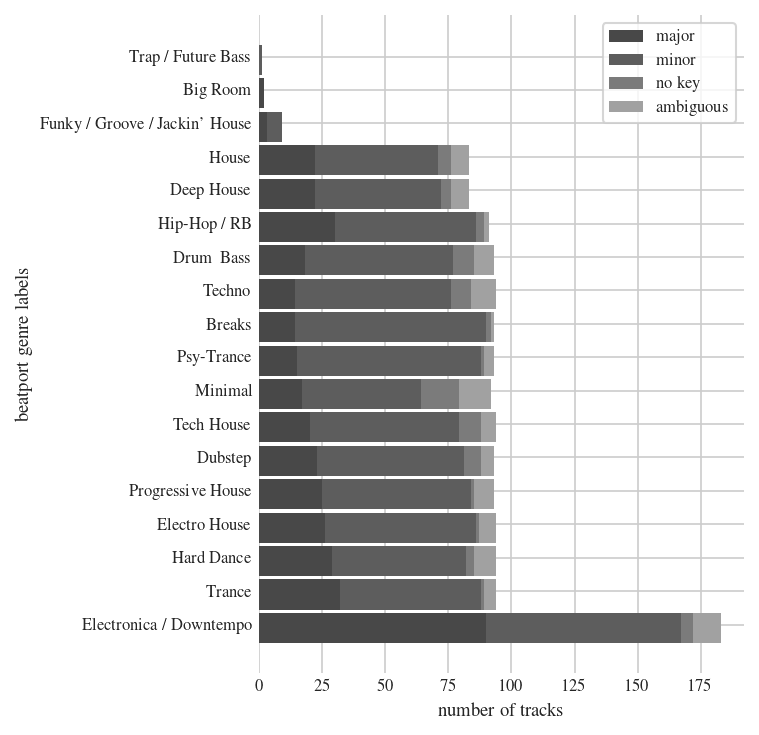

In [7]:
# BEATPORT GENRE STATISTICS

# adapt to new color range
sns.set_palette("Greys_d", 4)

# load data from spreadsheet
d = pd.read_excel('/Users/angel/Insync/Datasets/beatport/beatport.xlsx')

# obtain statistics per key per genre

gen = []
for genre in d.genres.unique():
    temp = d[d.genres==genre]
    major, minor, nokey, other = [0,0,0,0]

    t = temp[(temp.key1.str.contains('minor') == True) & (temp.key1.str.contains('\|') == False)]
    t = t.key1.str.contains('minor')
    try:
        minor = t.value_counts()[True]
    except:
        pass

    t = temp[(temp.key1.str.contains('major') == True) & (temp.key1.str.contains('\|') == False)]
    t = t.key1.str.contains('major')
    try:
        major = t.value_counts()[True]
    except:
        pass

    t = temp.key1.str.contains('X')
    try:
        nokey = t.value_counts()[True]
    except:
        pass
    
    t = temp[(temp.key1.str.contains('other') == False) & (temp.key1.str.contains('\|') == True)]
    t = t.key1.str.contains('\|')
    try:
        other = t.value_counts()[True]
    except:
        pass

    t = temp[(temp.key1.str.contains('other') == True) & (temp.key1.str.contains('\|') == False)]
    t = t.key1.str.contains('other')
    try:
        other += t.value_counts()[True]
    except:
        pass
    
    gen.append([int(len(temp)),int(major), int(minor), int(nokey), int(other), str(genre)])
    
# ordena los géneros en base a número de elementos
gen.sort(reverse=True)


name="bpgenres" 
output_dir="/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/"
    
major = np.array(np.column_stack(gen)[1].astype(np.int))
minor = np.array(np.column_stack(gen)[2].astype(np.int))
nokey = np.array(np.column_stack(gen)[3].astype(np.int))
other = np.array(np.column_stack(gen)[4].astype(np.int))
    
total_maj = np.sum(major)
total_min = np.sum(minor)
total_nokey = np.sum(nokey)
total_other = np.sum(other)
total_items = total_maj + total_min + total_nokey + total_other

# NOW THE PLOTTING
plt.figure(figsize=(5.16, 5), dpi=150)
plt.ylabel('beatport genre labels')
plt.xlabel('number of tracks')
plt.yticks(np.add(range(len(gen)), 0.1), np.column_stack(gen)[5].astype(str))
plt.barh(range(len(gen)), major, height=0.9, label='major')
plt.barh(range(len(gen)), minor, height=0.9, left=major, label='minor')
plt.barh(range(len(gen)), nokey, height=0.9, left=major+minor, label='no key')
plt.barh(range(len(gen)), other, height=0.9, left=major+minor+nokey, label='ambiguous')
plt.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, re.sub(' ', '_', name) + '.pdf'), format="pdf", dpi=PRINT_QUALITY)

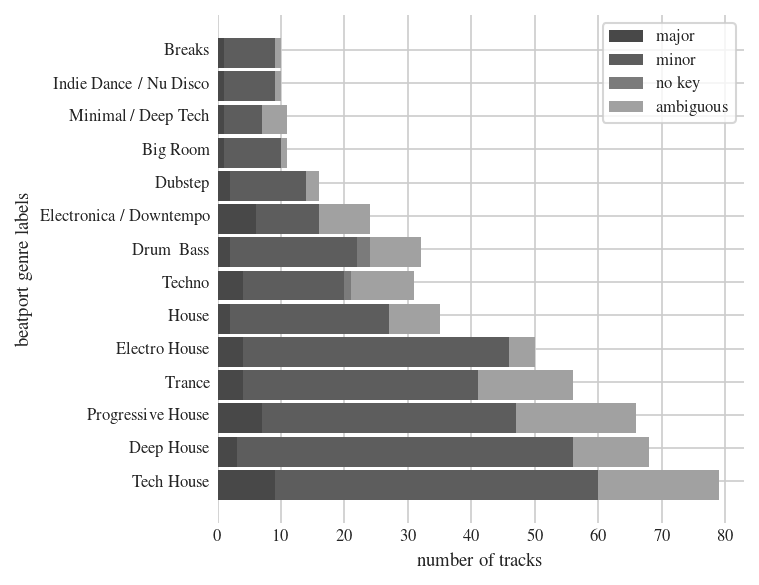

In [8]:
# FOR GIANTSTEPS PLUS

# adapt to new color range
sns.set_palette("Greys_d", 4)

# carga datos desde hoja de cálculo
d = pd.read_excel('/Users/angel/Insync/Datasets/giantsteps/GiantSteps_v3.xlsx')

# solo GS+
d = d[d['*']=='+']


gen = []
for genre in d.genres.unique():
    temp = d[d.genres==genre]
    major, minor, nokey, other = [0,0,0,0]

    t = temp[(temp.key_multi.str.contains('minor') == True) & (temp.key_multi.str.contains('\|') == False)]
    t = t.key_multi.str.contains('minor')
    try:
        minor = t.value_counts()[True]
    except:
        pass

    t = temp[(temp.key_multi.str.contains('major') == True) & (temp.key_multi.str.contains('\|') == False)]
    t = t.key_multi.str.contains('major')
    try:
        major = t.value_counts()[True]
    except:
        pass

    t = temp.key_multi.str.contains('X')
    try:
        nokey = t.value_counts()[True]
    except:
        pass

    t = temp[(temp.key_multi.str.contains('other') == False) & (temp.key_multi.str.contains('\|') == True)]
    t = t.key_multi.str.contains('\|')
    try:
        other = t.value_counts()[True]
    except:
        pass

    t = temp[(temp.key_multi.str.contains('other') == True) & (temp.key_multi.str.contains('\|') == False)]
    t = t.key_multi.str.contains('other')
    try:
        other += t.value_counts()[True]
    except:
        pass

    gen.append([int(len(temp)),int(major), int(minor), int(nokey), int(other), str(genre)])


# ordena los géneros en base a número de elementos
gen.sort(reverse=True)


name="gs+_genres" 
output_dir="/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/"
    
major = np.array(np.column_stack(gen)[1].astype(np.int))
minor = np.array(np.column_stack(gen)[2].astype(np.int))
nokey = np.array(np.column_stack(gen)[3].astype(np.int))
other = np.array(np.column_stack(gen)[4].astype(np.int))
    
total_maj = np.sum(major)
total_min = np.sum(minor)
total_nokey = np.sum(nokey)
total_other = np.sum(other)

total_items = total_maj + total_min + total_nokey + total_other

# NOW THE PLOTTING
plt.figure(figsize=(5.16, 4), dpi=150)

plt.ylabel('beatport genre labels')
plt.xlabel('number of tracks')
plt.yticks(np.add(range(len(gen)), 0.1), np.column_stack(gen)[5].astype(str))
plt.barh(range(len(gen)), major, height=0.9, label='major')
plt.barh(range(len(gen)), minor, height=0.9, left=major, label='minor')
plt.barh(range(len(gen)), nokey, height=0.9, left=major+minor, label='no key')
plt.barh(range(len(gen)), other, height=0.9, left=major+minor+nokey, label='ambiguous')
plt.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, re.sub(' ', '_', name) + '.pdf'), format="pdf", dpi=PRINT_QUALITY)